## Domača naloga 3
Marko Tacer, 23222087

Pri vaji smo s pomočjo generatorja zajeli signale z naslednjimi lastnostmi: \
Signal 1: Sinus \
Signal 2: Square \
Frekvenca: $3$Hz \
Amplituda (V_PP): $0.9$ \
Faza: $120 $ \
Offset: $2 V$ \
Frekvenca vzorčenja: $55$Hz \
Trajanje segmenta: $4s$ \
Skupno zajeti vzorci $4 \cdot 55 = 220$

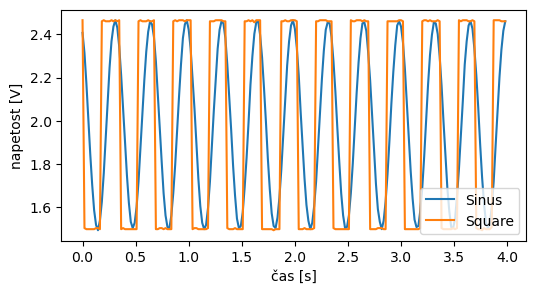

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lvm_read
from scipy import signal
from scipy.signal import find_peaks

# Uvozimo arrač časovnih korakov in array napetosti signala sinus 
file = 'marko-sin.lvm'
loaded_data = lvm_read.read(file)
data = loaded_data[0]['data'].T
loaded_data.keys()

t = data[0]
S1 = data[1]

file = 'marko-square.lvm'
loaded_data = lvm_read.read(file)
data = loaded_data[0]['data'].T

# Uvozimo še signal square in vse skupaj prikažemo
S2 = data[1]
fig = plt.figure(figsize=(6, 3))
plt.plot(t, S1, label='Sinus')
plt.plot(t, S2, label='Square')
plt.xlabel('čas [s]')
plt.ylabel('napetost [V]')
plt.legend(loc='lower right')
plt.show()

### Prikaz amplitudnega in faznega spektra v frekvenčni domeni

Fourierjeva transformacija signalov. Uporabimo realno fourierjevo transformacijo (rfft) za oba signala.
Omejitev naše transformacije je frekvenčni spekter, ki ga lahko izračunamo in sama frekvenčna ločljivost. Dolžina signala nam definira ločljivost - daljši signal $\rightarrow$ boljša ločljivost (manjši $\Delta f$). \
Višja kot je frekvenca fzorčenja, širši je naš razpon na frekvenčni osi po Fourierjevi transformaciji. Zavedati se moramo, da je dobro osnovno pravilo, da lahko popišemo in računamo največ frekvenco, ki je enaka polovici frekvence vzorčenja.

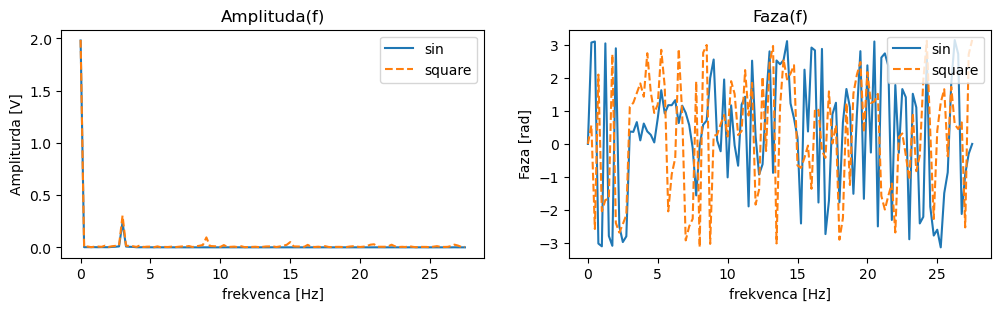

In [2]:
dt = t[2] - t[1]                            #definicija časovnega koraka
freq_re = np.fft.rfftfreq(len(t), dt)

X_1_r = np.fft.rfft(S1, norm="forward");    #transformacija sinusa  
X_2_r = np.fft.rfft(S2, norm="forward");    #transformacija square signala

fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.2,
                    hspace=0.7)

plt.subplot(2,2,1)
plt.gca().set_title('Amplituda(f)')
plt.plot(freq_re, np.abs(X_1_r), label='sin')
plt.plot(freq_re, np.abs(X_2_r), '--', label='square')
plt.xlabel('frekvenca [Hz]')
plt.ylabel('Ampliturda [V]')
plt.legend(loc='upper right')

plt.subplot(2,2,2)
plt.gca().set_title('Faza(f)')
plt.plot(freq_re, np.angle(X_1_r), label='sin')
plt.plot(freq_re, np.angle(X_2_r), '--', label='square')
plt.xlabel('frekvenca [Hz]')
plt.ylabel('Faza [rad]')
plt.legend(loc='upper right')
plt.show()

Iz grafov vidimo, da je pri frekvenci 0 vrednost 2, kar nam predstavlja DC offset, kar je ok. V sinusu se pojavi zgolj ena frekvenca ("špica na amplitudnem grafu) in sicer pri 3Hz. Pri square signalu pa so prisotni še višji harmoniki (vsak drugi).

### Numerično generiranje signalov

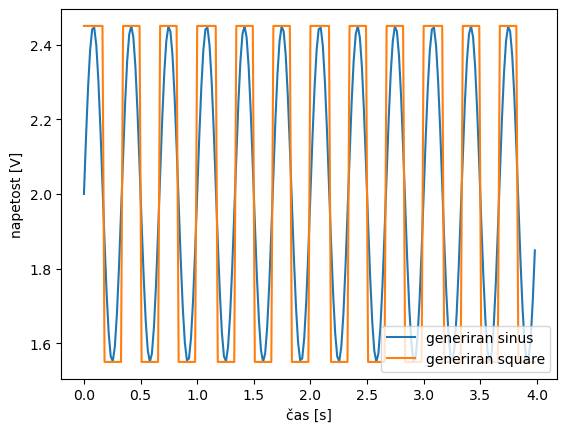

In [3]:
f = 3 * 2 * np.pi       #frekvenca v radianih/S
A = 0.9/2;              #amplituda
O = 2;                  #Offset
S12 = A * np.sin(f*t) + O
S22 = A * signal.square(f * t, duty=0.5) + O
# plt.plot(t, S12, '--')
plt.plot(t,S12, label='generiran sinus')
plt.plot(t,S22, label='generiran square')
plt.xlabel('čas [s]')
plt.ylabel('napetost [V]')
plt.legend(loc='lower right')
plt.show()


Fourierjeva transformacija generiranih signalov

In [4]:
X_12_r = np.fft.rfft(S12, norm="forward");
X_22_r = np.fft.rfft(S22, norm="forward");

### Primerjava sinusa

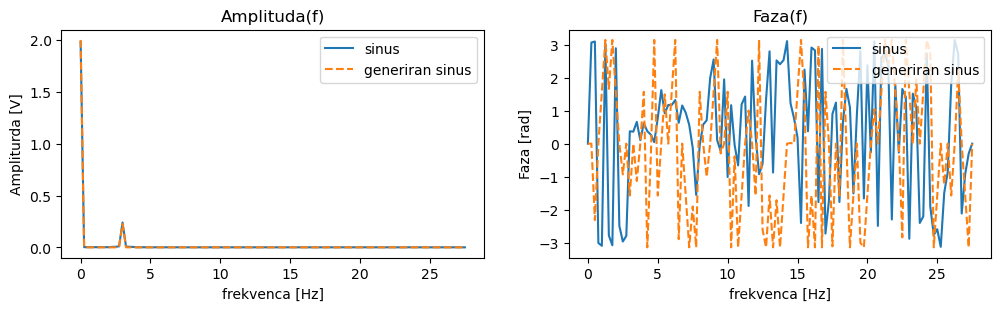

In [5]:
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.2,
                    hspace=0.7)

plt.subplot(2,2,1)
plt.gca().set_title('Amplituda(f)')
plt.plot(freq_re, np.abs(X_1_r), label='sinus')
plt.plot(freq_re, np.abs(X_12_r), '--', label='generiran sinus')
plt.xlabel('frekvenca [Hz]')
plt.ylabel('Ampliturda [V]')
plt.legend(loc='upper right')

plt.subplot(2,2,2)
plt.gca().set_title('Faza(f)')
plt.plot(freq_re, np.angle(X_1_r), label='sinus')
plt.plot(freq_re, np.angle(X_12_r), '--', label='generiran sinus')
plt.xlabel('frekvenca [Hz]')
plt.ylabel('Faza [rad]')
plt.legend(loc='upper right')
plt.show()

### Primerjava square

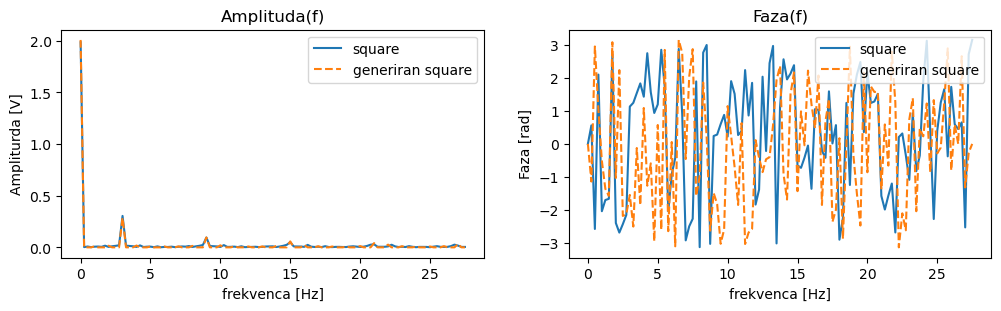

In [6]:
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.2,
                    hspace=0.7)

plt.subplot(2,2,1)
plt.gca().set_title('Amplituda(f)')
plt.plot(freq_re, np.abs(X_2_r), label='square')
plt.plot(freq_re, np.abs(X_22_r), '--', label='generiran square')
plt.xlabel('frekvenca [Hz]')
plt.ylabel('Ampliturda [V]')
plt.legend(loc='upper right')

plt.subplot(2,2,2)
plt.gca().set_title('Faza(f)')
plt.plot(freq_re, np.angle(X_2_r), label='square')
plt.plot(freq_re, np.angle(X_22_r), '--', label='generiran square')
plt.xlabel('frekvenca [Hz]')
plt.ylabel('Faza [rad]')
plt.legend(loc='upper right')
plt.show()

### Časovni premik Fourierjeve transformacije

Najprej je treba ugotoviti samo razliko v fazi. To lahko ugotovimo tako, da najdemo vrhove posameznega sinusnega signala.

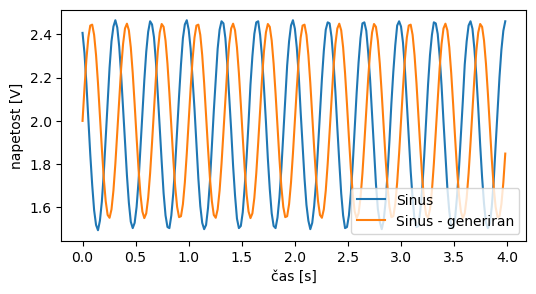

In [7]:
fig = plt.figure(figsize=(6, 3))
plt.plot(t, S1, label='Sinus')
plt.plot(t, S12, label='Sinus - generiran')
plt.xlabel('čas [s]')
plt.ylabel('napetost [V]')
plt.legend(loc='lower right')
plt.show()

In [8]:
peak_S1 = signal.find_peaks(S1)[0][:8]
peak_S1_generiran = signal.find_peaks(S12)[0][:8]
t1 = t[peak_S1]
t2 = t[peak_S1_generiran]
delta_t = np.average(t2[2] - t1[1])
delta_t

0.10909099999999994

In [9]:
peak_S2 = signal.find_peaks(-S2)[0][:8]
peak_S2_generiran = signal.find_peaks(-S22)[0][:8]
t1 = t[peak_S2]
t2 = t[peak_S2_generiran]
delta_t2 = np.average(t2[1] - t1[1])
delta_t2

0.41818199999999994

Za premik v frekvenčni domeni moramo samo fourierjevo tranformacijo pomnožiti z $$\exp^{-2 j \cdot 2 \pi f \cdot \Delta t},$$
Zdaj ko poznamo $\Delta t$ lahko to storimo

In [10]:
S12_premaknjen = np.fft.rfft(S12) * np.e**(-2j * 2 * np.pi * freq_re * delta_t) # premaknemo sinus
S22_premaknjen = np.fft.rfft(S22) * np.e**(-2j * 2 * np.pi * freq_re * delta_t2) # premaknemo square

Vidimo, da se sinusni signal lepo pokrije, medtem ko se square signal manj lepo. Na začetku je sicer 

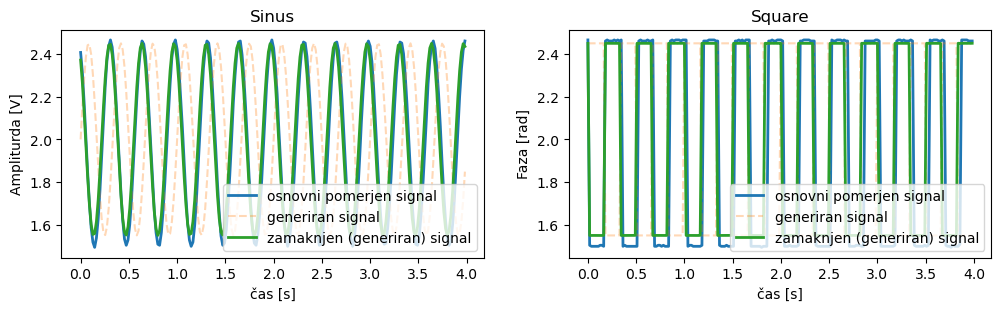

In [11]:
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.2,
                    hspace=0.7)

plt.subplot(2,2,1)
plt.gca().set_title('Sinus')
plt.plot(t, S1, lw=2, label='osnovni pomerjen signal')
plt.plot(t, S12, '--', alpha=0.3, label='generiran signal')
plt.plot(t, np.fft.irfft(S12_premaknjen), lw=2,  label='zamaknjen (generiran) signal')
plt.xlabel('čas [s]')
plt.ylabel('Ampliturda [V]')
plt.legend(loc='lower right')

plt.subplot(2,2,2)
plt.gca().set_title('Square')
plt.plot(t, S2, lw=2, label='osnovni pomerjen signal')
plt.plot(t, S22, '--', alpha=0.3, label='generiran signal')
plt.plot(t, np.fft.irfft(S22_premaknjen), lw=2,  label='zamaknjen (generiran) signal')
plt.xlabel('čas [s]')
plt.ylabel('Faza [rad]')
plt.legend(loc='lower right')
plt.show()